# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

In [4]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [5]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
X = df.drop(['Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(227845, 30)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [22]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)

y_pred_const = np.zeros(len(X_test))

knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train[:10000], y_train[:10000])  # обучим по первым 10000, а то слишком долго
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)

In [23]:
print(f'Accuracy const = {accuracy_score(y_test, y_pred_const)}')
print(f'Accuracy log_reg = {accuracy_score(y_test, y_pred_log_reg)}')
print(f'Accuracy KNN = {accuracy_score(y_test, y_pred_knn)}')
print(f'Precision const = {precision_score(y_test, y_pred_const)}')
print(f'Precision log_reg = {precision_score(y_test, y_pred_log_reg)}')
print(f'Precision KNN = {precision_score(y_test, y_pred_knn)}')
print(f'Recall const = {recall_score(y_test, y_pred_const)}')
print(f'Recall log_reg = {recall_score(y_test, y_pred_log_reg)}')
print(f'Recall KNN = {recall_score(y_test, y_pred_knn)}')
print(f'F1-score const = {f1_score(y_test, y_pred_const)}')
print(f'F1-score log_reg = {f1_score(y_test, y_pred_log_reg)}')
print(f'F1-score KNN = {f1_score(y_test, y_pred_knn)}')
print(f'ROC-AUC log_reg = {roc_auc_score(y_test, y_pred_proba_log_reg[:, 1])}')
print(f'ROC-AUC KNN = {roc_auc_score(y_test, y_pred_proba_knn[:, 1])}')

Accuracy const = 0.9982795547909132
Accuracy log_reg = 0.9988939995084443
Accuracy KNN = 0.9982444436641972
Precision const = 0.0
Precision log_reg = 0.7868852459016393
Precision KNN = 0.3333333333333333
Recall const = 0.0
Recall log_reg = 0.4897959183673469
Recall KNN = 0.02040816326530612
F1-score const = 0.0
F1-score log_reg = 0.6037735849056604
F1-score KNN = 0.03846153846153846
ROC-AUC log_reg = 0.9487753810021475
ROC-AUC KNN = 0.5243111383551732


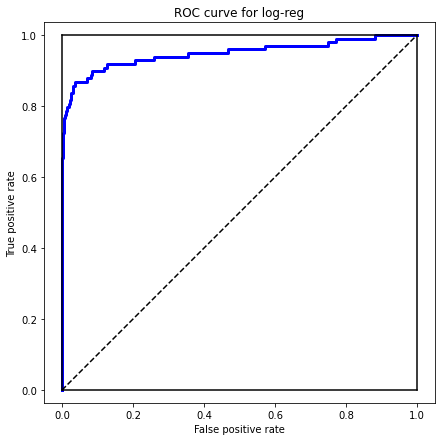

In [24]:
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_reg[:, 1])
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve for log-reg')
plt.show()

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Важно вовремя предотвратить мошенническую транзакцию. Если мы ошибемся и признаем нормальную транзакцию мошеннической, это не так страшно, как пропустить реально мошенническую. Поэтому выберем метрику <b>recall. 

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

Попробуем штрафовать за неопределенный акт мошенничества больше. Сильно загружать наших сотрудников не хотим, поэтому будем следить и за precision (ну и за f1-score тоже тогда) 

In [25]:
precision_results = []
recall_results = []
f1_results = []

for first_weight in range(0, 20):
    log_reg = LogisticRegression(class_weight={0: 1, 1: first_weight}, max_iter=1000)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    
    precision_results.append(precision_score(y_test, y_pred))
    recall_results.append(recall_score(y_test, y_pred))
    f1_results.append(f1_score(y_test, y_pred))

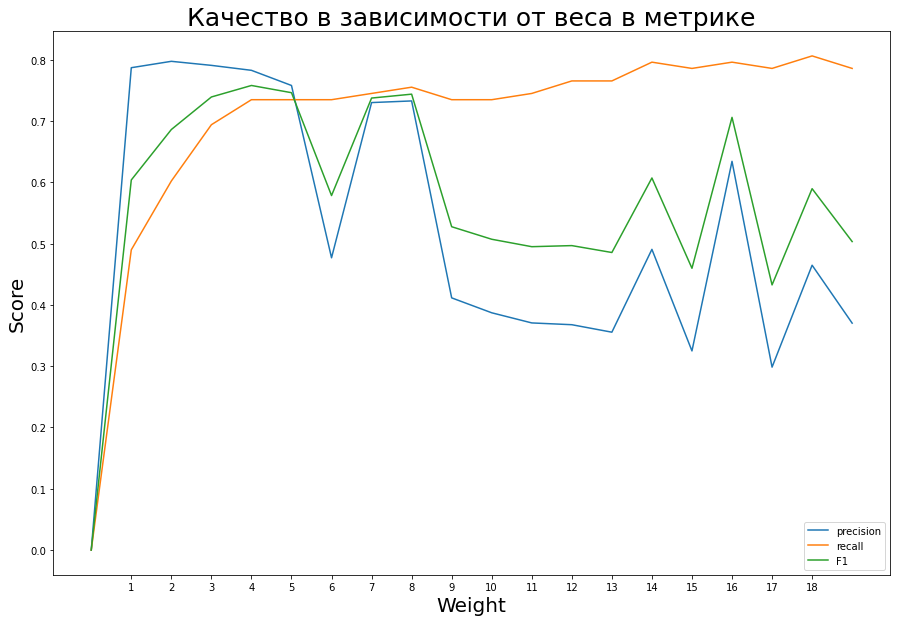

In [26]:
plt.figure(figsize=(15, 10))

plt.plot(precision_results)
plt.plot(recall_results)
plt.plot(f1_results)

plt.legend(['precision', 'recall', 'F1'])
plt.xticks(list(range(1, 19)))
plt.ylabel('Score', fontsize=20)
plt.xlabel('Weight', fontsize=20)
plt.title('Качество в зависимости от веса в метрике', fontsize=25)

plt.show()

Вес 8 неплохо смотрится: и recall сносный, и precision не просядает - возьмем его.

In [32]:
best_weight = 8
log_reg = LogisticRegression(class_weight={0: 1, 1: best_weight}, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)

In [33]:
print(f'Accuracy log_reg = {accuracy_score(y_test, y_pred_log_reg)}')
print(f'Precision log_reg = {precision_score(y_test, y_pred_log_reg)}')
print(f'Recall log_reg = {recall_score(y_test, y_pred_log_reg)}')
print(f'F1-score log_reg = {f1_score(y_test, y_pred_log_reg)}')
print(f'ROC-AUC log_reg = {roc_auc_score(y_test, y_pred_proba_log_reg[:, 1])}')

Accuracy log_reg = 0.9991046662687406
Precision log_reg = 0.7326732673267327
Recall log_reg = 0.7551020408163265
F1-score log_reg = 0.743718592964824
ROC-AUC log_reg = 0.9624706065600129


In [34]:
print(f'Коэффициент при Time = {log_reg.coef_[0][0]:.5f}')

Коэффициент при Time = -0.00005


Метрики реально лучше, чем без best_weight. Попробуем еще выкинуть из признаков Time, который, судя по коэффициентам, не очень помогает регрессии (более сложной модели он, может быть, и помог бы).

In [35]:
log_reg = LogisticRegression(class_weight={0: 1, 1: best_weight}, max_iter=1000)
log_reg.fit(X_train.drop('Time', axis=1), y_train)
y_pred_log_reg = log_reg.predict(X_test.drop('Time', axis=1))
y_pred_proba_log_reg = log_reg.predict_proba(X_test.drop('Time', axis=1))

In [36]:
print(f'Accuracy log_reg = {accuracy_score(y_test, y_pred_log_reg)}')
print(f'Precision log_reg = {precision_score(y_test, y_pred_log_reg)}')
print(f'Recall log_reg = {recall_score(y_test, y_pred_log_reg)}')
print(f'F1-score log_reg = {f1_score(y_test, y_pred_log_reg)}')
print(f'ROC-AUC log_reg = {roc_auc_score(y_test, y_pred_proba_log_reg[:, 1])}')

Accuracy log_reg = 0.9993504441557529
Precision log_reg = 0.8144329896907216
Recall log_reg = 0.8061224489795918
F1-score log_reg = 0.8102564102564104
ROC-AUC log_reg = 0.9781499790405752


Все метрики действительно улучшились. Ну и в качестве бонуса - ROC-AUC.

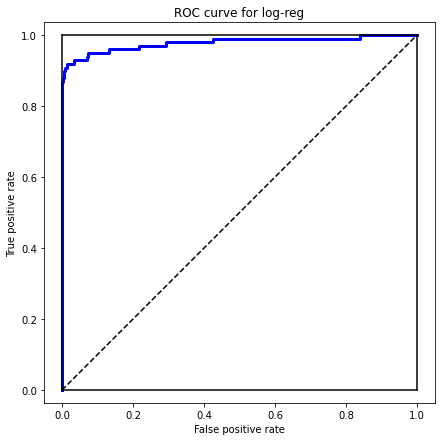

In [37]:
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_reg[:, 1])
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve for log-reg')
plt.show()

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

Будем определять класс объекта: галактика, звезда или квазар.

In [38]:
df = pd.read_csv('star_classification.csv')

In [39]:
X = df.drop(['class'], axis=1)
X.drop(['alpha', 'delta', 'obj_ID', 'run_ID', 'rerun_ID', 'field_ID',
        'spec_obj_ID', 'MJD', 'plate', 'fiber_ID'], axis=1, inplace=True)  # уберем технические колонки
y = df['class']

le = LabelEncoder()
le.fit(y)
y = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X

,u,g,r,i,z,cam_col,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,2,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,5,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,2,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,3,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,3,0.116123
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,2,0.000000
99996,22.69118,22.38628,20.45003,19.75759,19.41526,1,0.404895
99997,21.16916,19.26997,18.20428,17.69034,17.35221,4,0.143366
99998,25.35039,21.63757,19.91386,19.07254,18.62482,4,0.455040


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [40]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)

y_pred_const = np.zeros(len(X_test))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)

In [41]:
print(f'Accuracy const = {accuracy_score(y_test, y_pred_const)}')
print(f'Accuracy log_reg = {accuracy_score(y_test, y_pred_log_reg)}')
print(f'Accuracy KNN = {accuracy_score(y_test, y_pred_knn)}')
print()

print('Precision macro log_reg =', precision_score(y_test, y_pred_log_reg, average='macro'))
print('Precision macro KNN =', precision_score(y_test, y_pred_knn, average='macro'))
print()
print('Recall macro log_reg =', recall_score(y_test, y_pred_log_reg, average='macro'))
print('Recall macro KNN =', recall_score(y_test, y_pred_knn, average='macro'))
print()
print('F1-score macro log_reg =', f1_score(y_test, y_pred_log_reg, average='macro'))
print('F1-score macro KNN =', f1_score(y_test, y_pred_knn, average='macro'))
print()

print('Precision micro log_reg =', precision_score(y_test, y_pred_log_reg, average='micro'))
print('Precision micro KNN =', precision_score(y_test, y_pred_knn, average='micro'))
print()
print('Recall micro log_reg =', recall_score(y_test, y_pred_log_reg, average='micro'))
print('Recall micro KNN =', recall_score(y_test, y_pred_knn, average='micro'))
print()
print('F1-score micro log_reg =', f1_score(y_test, y_pred_log_reg, average='micro'))
print('F1-score micro KNN =', f1_score(y_test, y_pred_knn, average='micro'))

Accuracy const = 0.593
Accuracy log_reg = 0.95145
Accuracy KNN = 0.93265

Precision macro log_reg = 0.9460360664727286
Precision macro KNN = 0.9289340153071027

Recall macro log_reg = 0.9445897299358678
Recall macro KNN = 0.9230373042163248

F1-score macro log_reg = 0.9445977909227906
F1-score macro KNN = 0.9256244684319775

Precision micro log_reg = 0.95145
Precision micro KNN = 0.93265

Recall micro log_reg = 0.95145
Recall micro KNN = 0.93265

F1-score micro log_reg = 0.95145
F1-score micro KNN = 0.93265


По всем метрикам log-reg немного лучше, поэтому будет улучшать его.

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Будем улучшать accuracy. Поскольку особых требований к метрике у нас нет, будем улучшать основную.

In [49]:
from tqdm import tqdm
accuracy_results = []
Cs = np.arange(0, 150, 8)

for C in tqdm(Cs):
    log_reg = LogisticRegression(C = C, max_iter=1000, n_jobs=-1)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    
    accuracy_results.append(accuracy_score(y_test, y_pred))

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [10:16<00:00, 32.47s/it]


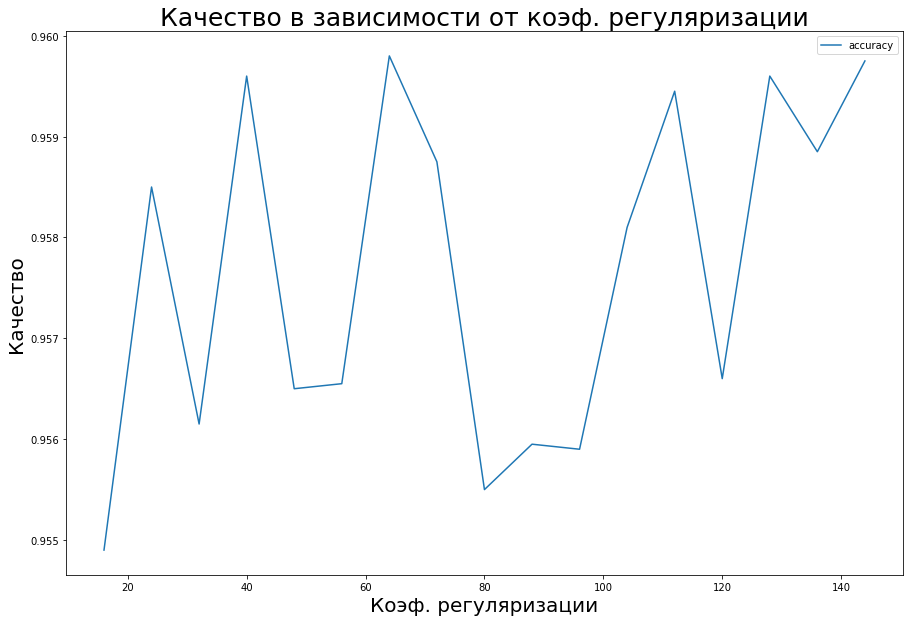

In [51]:
plt.figure(figsize=(15, 10))

plt.plot(Cs[2:], accuracy_results[2:])

plt.legend(['accuracy'])
plt.ylabel('Качество', fontsize=20)
plt.xlabel('Коэф. регуляризации', fontsize=20)
plt.title('Качество в зависимости от коэф. регуляризации', fontsize=25)

plt.show()

In [52]:
log_reg = LogisticRegression(C=Cs[np.argmax(accuracy_results)], max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print(f'Accuracy log_reg = {accuracy_score(y_test, y_pred_log_reg)}')

Accuracy log_reg = 0.9593


Результатов добились действительно неплохих, достаточно точно различаем объекты. Ура!